In [1]:
import keras

Using TensorFlow backend.


In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ImportError: No module named keras

In [3]:
# grayscale and normalize
def normalizeImg(img):    
    gray = np.dot(img.squeeze()[...,:3], [0.299, 0.587, 0.114])
    normalize = (gray - 128) / 128   
    
    return normalize.reshape(28,28,1)
import cv2

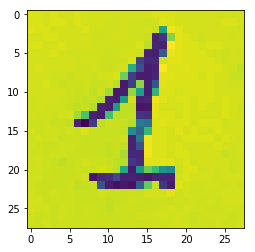

In [31]:
# read image
# show image
# resize image
# show image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image

#sign1 = np.asarray(Image.open('test_data/1.jpg').resize((28, 28)))
sign1 = cv2.imread('test_data/1.jpg',0)
sign1 = cv2.resize(sign1, (28, 28)) 
plt.imshow(sign1)
plt.show()


In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(input_shape)
print(sign1.shape)
print(x_train[2].shape)

sign1 = sign1.reshape(img_rows, img_cols,1)
sign1 = sign1.astype('float32')
sign1 /= 255

print(sign1.shape)

(28, 28, 1)
(28, 28)
(28, 28)
(28, 28, 1)


In [34]:
# predict
result = model.predict(sign1)
print(result)

ValueError: Error when checking : expected conv2d_1_input to have 4 dimensions, but got array with shape (28, 28, 1)